In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import yfinance as yf 

In [3]:
start = '2012-01-01'
end = '2022-01-01'

stock = 'GOOG'
data  = yf.download(stock,start,end)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [4]:
data.reset_index(inplace=True)

In [5]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2012-01-03,16.495001,16.562924,16.171749,16.185880,147611217
1,2012-01-04,16.566147,16.614982,16.376262,16.485582,114989399
2,2012-01-05,16.336349,16.459304,16.267435,16.413692,131808205
3,2012-01-06,16.113495,16.360891,16.107792,16.339819,108119746
4,2012-01-09,15.430305,16.038633,15.399813,16.026237,233776981
...,...,...,...,...,...,...
2512,2021-12-27,147.365997,147.726791,146.555839,146.768334,13256000
2513,2021-12-28,145.757629,147.675046,145.247548,147.675046,18624000
2514,2021-12-29,145.813873,146.489916,144.818587,145.739230,17022000


In [6]:
ma_100_days = data.Close.rolling(100).mean()

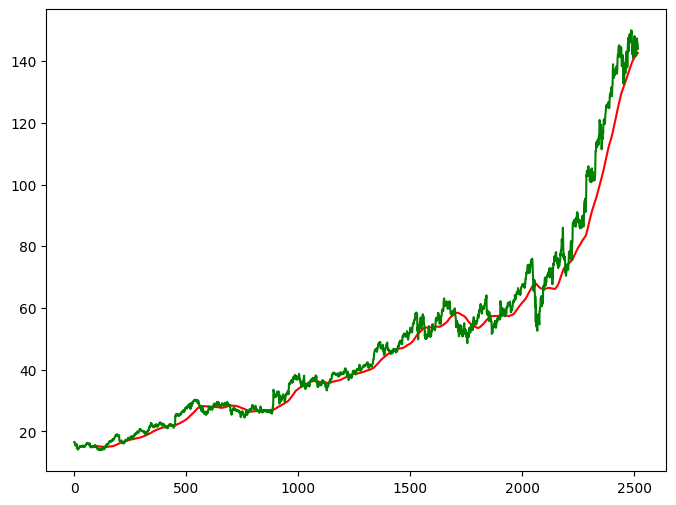

In [7]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(data.Close,'g')
plt.show()

In [8]:
ma_200_days = data.Close.rolling(200).mean()

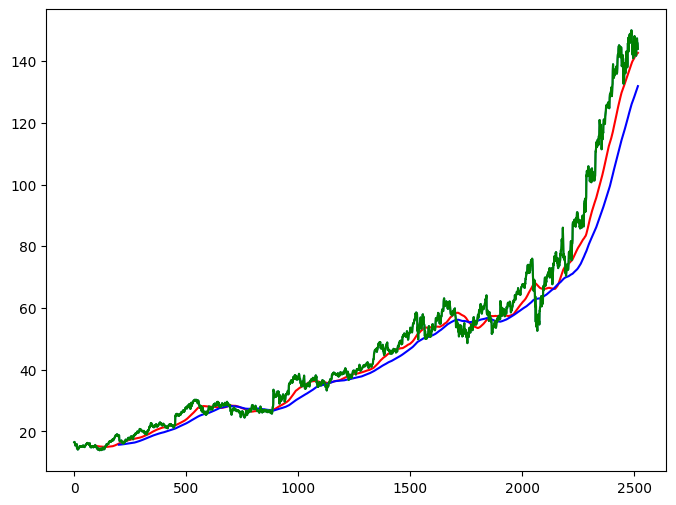

In [9]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close)
plt.plot(data.Close,'g')
plt.show()

In [10]:
data.dropna(inplace=True)

In [11]:
#data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)]) 
#data_test = pd.DataFrame(data.Close[int(len(data)*0.80)len(data)])
data_train = pd.DataFrame(data.Close[0:int(len(data)*0.80)])

data_test = pd.DataFrame(data.Close[int(len(data)*0.80):len(data)])


In [12]:
data_train.shape[0]

2013

In [13]:
data_test.shape[0]

504

In [14]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler(feature_range=(0,1))

In [15]:

data_train_scale = scaler.fit_transform(data_train)


In [16]:
x = [] 
y = []

for i in range(100,data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0]) 

In [17]:
x,y = np.array(x),np.array(y)

In [18]:
from keras.layers  import Dense, Dropout , LSTM  # type: ignore
from keras.models import Sequential    # type: ignore


In [19]:

model = Sequential()

# First LSTM layer
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x.shape[1], 1)))
model.add(Dropout(0.2))

# Second LSTM layer
model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

# Third LSTM layer
model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

# Fourth LSTM layer
model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

# Output Dense layer
model.add(Dense(units=1))



c:\Users\Vijay kumar\OneDrive\Desktop\ML project for stock market\env\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [21]:
model.fit(x,y, epochs =50 ,batch_size=32,verbose=1)

Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 14s 154ms/step - loss: 0.1001
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 167ms/step - loss: 0.0098
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 163ms/step - loss: 0.0075
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 177ms/step - loss: 0.0075
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 145ms/step - loss: 0.0067
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 153ms/step - loss: 0.0062
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 157ms/step - loss: 0.0061
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 174ms/step - loss: 0.0057
Epoch 9/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 151ms/step - loss: 0.0065
Epoch 10/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 175ms/step - loss: 0.0058
Epoch 11/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 168ms/step - loss: 0.0047
Epoch 12/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 157ms/step - loss: 0.0045
Epoch 13/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 141ms/step - loss: 0.0052
Epoch 14/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 148ms/step - loss: 0.0051
Epoch 15/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 158ms/st

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [23]:
pas_100_days = data_train.tail(100)

In [24]:
data_test = pd.concat([pas_100_days,data_test],ignore_index = True)

In [25]:
data_test_scale = scaler.fit_transform(data_test)

In [26]:
x = [] 
y = []

for i in range(100,data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0]) 
x,y = np.array(x),np.array(y)

In [27]:
y_pridict = model.predict(x)

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step


In [28]:
scale = 1/scaler.scale_

In [29]:
y_pridict = y_pridict*scale 

In [30]:
y = y*scale

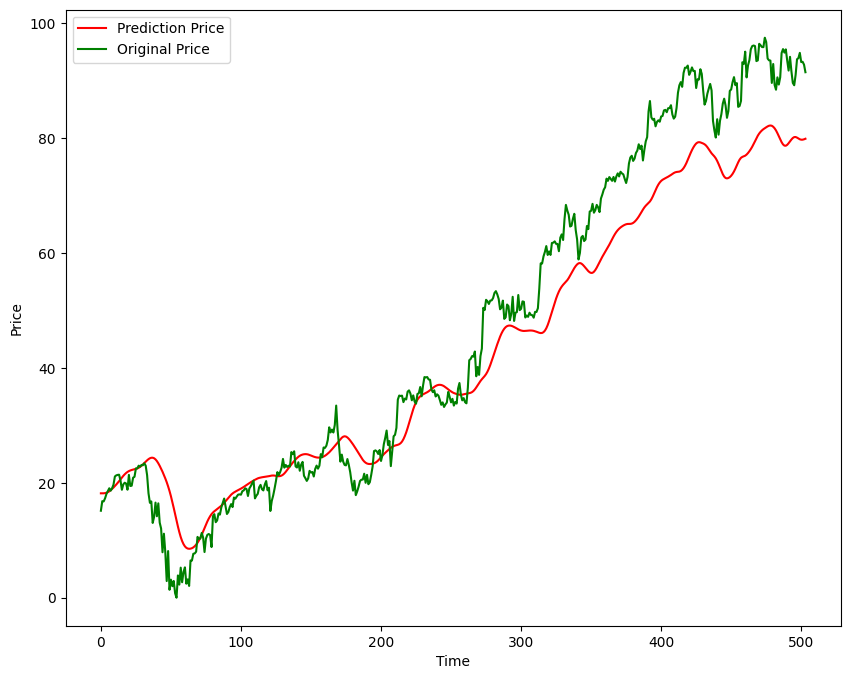

In [31]:
plt.figure(figsize =(10,8))
plt.plot(y_pridict, 'r',label='Prediction Price')
plt.plot(y,'g',label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [32]:
model.save('stock pridiction model.keras' )